# JSON examples and exercise
****
+ get familiar with packages for dealing with JSON
+ study examples with JSON strings and files 
+ work on exercise to be completed and submitted 
****
+ reference: http://pandas.pydata.org/pandas-docs/stable/io.html#io-json-reader
****

In [1]:
import pandas as pd

## imports for Python, Pandas

In [2]:
import json
from pandas.io.json import json_normalize

## JSON example, with string

+ demonstrates creation of normalized dataframes (tables) from nested json string
+ source: http://pandas.pydata.org/pandas-docs/stable/io.html#normalization

In [3]:
# define json string
data = [{'state': 'Florida', 
         'shortname': 'FL',
         'info': {'governor': 'Rick Scott'},
         'counties': [{'name': 'Dade', 'population': 12345},
                      {'name': 'Broward', 'population': 40000},
                      {'name': 'Palm Beach', 'population': 60000}]},
        {'state': 'Ohio',
         'shortname': 'OH',
         'info': {'governor': 'John Kasich'},
         'counties': [{'name': 'Summit', 'population': 1234},
                      {'name': 'Cuyahoga', 'population': 1337}]}]

In [4]:
# use normalization to create tables from nested element
json_normalize(data, 'counties')

,name,population
0,Dade,12345
1,Broward,40000
2,Palm Beach,60000
3,Summit,1234
4,Cuyahoga,1337


In [5]:
# further populate tables created from nested element
json_normalize(data, 'counties', ['state', 'shortname', ['info', 'governor']])

,name,population,state,shortname,info.governor
0,Dade,12345,Florida,FL,Rick Scott
1,Broward,40000,Florida,FL,Rick Scott
2,Palm Beach,60000,Florida,FL,Rick Scott
3,Summit,1234,Ohio,OH,John Kasich
4,Cuyahoga,1337,Ohio,OH,John Kasich


****
## JSON example, with file

+ demonstrates reading in a json file as a string and as a table
+ uses small sample file containing data about projects funded by the World Bank 

In [7]:
# load json as string
json.load((open('data/world_bank_projects_less.json')))

[{'_id': {'$oid': '52b213b38594d8a2be17c780'},
  'approvalfy': 1999,
  'board_approval_month': 'November',
  'boardapprovaldate': '2013-11-12T00:00:00Z',
  'borrower': 'FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA',
  'closingdate': '2018-07-07T00:00:00Z',
  'country_namecode': 'Federal Democratic Republic of Ethiopia!$!ET',
  'countrycode': 'ET',
  'countryname': 'Federal Democratic Republic of Ethiopia',
  'countryshortname': 'Ethiopia',
  'docty': 'Project Information Document,Indigenous Peoples Plan,Project Information Document',
  'envassesmentcategorycode': 'C',
  'grantamt': 0,
  'ibrdcommamt': 0,
  'id': 'P129828',
  'idacommamt': 130000000,
  'impagency': 'MINISTRY OF EDUCATION',
  'lendinginstr': 'Investment Project Financing',
  'lendinginstrtype': 'IN',
  'lendprojectcost': 550000000,
  'majorsector_percent': [{'Name': 'Education', 'Percent': 46},
   {'Name': 'Education', 'Percent': 26},
   {'Name': 'Public Administration, Law, and Justice', 'Percent': 16},
   {'Name': 'Educatio

In [8]:
# load as Pandas dataframe
sample_json_df = pd.read_json('data/world_bank_projects_less.json')
sample_json_df

,_id,approvalfy,board_approval_month,boardapprovaldate,borrower,closingdate,country_namecode,countrycode,countryname,countryshortname,...,sectorcode,source,status,supplementprojectflg,theme1,theme_namecode,themecode,totalamt,totalcommamt,url
0,{'$oid': '52b213b38594d8a2be17c780'},1999,November,2013-11-12T00:00:00Z,FEDERAL DEMOCRATIC REPUBLIC OF ETHIOPIA,2018-07-07T00:00:00Z,Federal Democratic Republic of Ethiopia!$!ET,ET,Federal Democratic Republic of Ethiopia,Ethiopia,...,"ET,BS,ES,EP",IBRD,Active,N,"{'Name': 'Education for all', 'Percent': 100}","[{'name': 'Education for all', 'code': '65'}]",65,130000000,130000000,http://www.worldbank.org/projects/P129828/ethi...
1,{'$oid': '52b213b38594d8a2be17c781'},2015,November,2013-11-04T00:00:00Z,GOVERNMENT OF TUNISIA,NaN,Republic of Tunisia!$!TN,TN,Republic of Tunisia,Tunisia,...,"BZ,BS",IBRD,Active,N,"{'Name': 'Other economic management', 'Percent...","[{'name': 'Other economic management', 'code':...","54,24",0,4700000,http://www.worldbank.org/projects/P144674?lang=en


****
## JSON exercise

Using data in file 'data/world_bank_projects.json' and the techniques demonstrated above,
1. Find the 10 countries with most projects
2. Find the top 10 major project themes (using column 'mjtheme_namecode')
3. In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [9]:
data = json.load((open('data/world_bank_projects.json')))

In [10]:
df = json_normalize(data)

In [11]:
df.columns

Index(['sector', 'supplementprojectflg', 'projectfinancialtype', 'prodline',
       'mjtheme', 'idacommamt', 'impagency', 'project_name', 'mjthemecode',
       'closingdate', 'totalcommamt', 'id', 'mjsector_namecode', 'docty',
       'lendinginstr', 'countrycode', 'totalamt', 'mjtheme_namecode',
       'boardapprovaldate', 'countryshortname', 'prodlinetext',
       'productlinetype', 'regionname', 'status', 'country_namecode',
       'envassesmentcategorycode', 'approvalfy', 'projectdocs',
       'lendprojectcost', 'lendinginstrtype', 'grantamt', 'themecode',
       'borrower', 'sectorcode', 'majorsector_percent', 'board_approval_month',
       'theme_namecode', 'countryname', 'url', 'source',
       'projectstatusdisplay', 'ibrdcommamt', 'sector_namecode',
       'sector1.Percent', 'sector1.Name', 'sector2.Percent', 'sector2.Name',
       'sector4.Percent', 'sector4.Name', 'project_abstract.cdata',
       'theme1.Percent', 'theme1.Name', 'sector3.Percent', 'sector3.Name',
       '_id.

In [12]:
#1. Find the 10 countries with most projects
df.countryname.value_counts().head(10)

Republic of Indonesia              19
People's Republic of China         19
Socialist Republic of Vietnam      17
Republic of India                  16
Republic of Yemen                  13
Nepal                              12
People's Republic of Bangladesh    12
Kingdom of Morocco                 12
Africa                             11
Republic of Mozambique             11
Name: countryname, dtype: int64

In [13]:
#2. Find the top 10 major project themes (using column 'mjtheme_namecode')
df_theme = json_normalize(data, 'mjtheme_namecode')
df_theme.name.value_counts().head(10)

Environment and natural resources management    223
Rural development                               202
Human development                               197
Public sector governance                        184
Social protection and risk management           158
Financial and private sector development        130
                                                122
Social dev/gender/inclusion                     119
Trade and integration                            72
Urban development                                47
Name: name, dtype: int64

In [14]:
#3 In 2. above you will notice that some entries have only the code and the name is missing. Create a dataframe with the missing names filled in.

In [15]:
import numpy as np
import missingno as msno 

In [16]:
df_theme.head()

,code,name
0,8,Human development
1,11,
2,1,Economic management
3,6,Social protection and risk management
4,5,Trade and integration


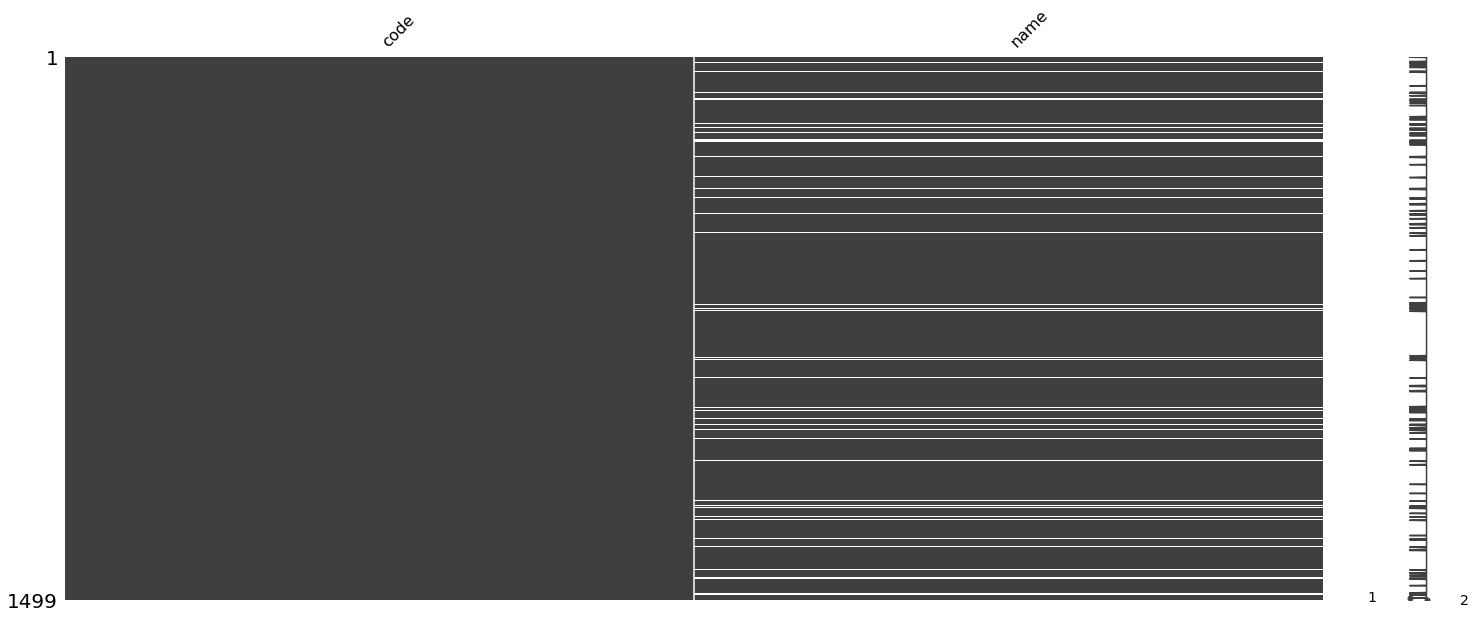

In [17]:
#replace '' with NaN and visualize Nan
df_theme.name.replace('', np.nan, inplace = True)
msno.matrix(df_theme) 

In [18]:
#Sort by code and forward fill NaN values
df_theme = df_theme.sort_values('code')
df_theme.name.fillna(method = 'ffill', inplace = True)

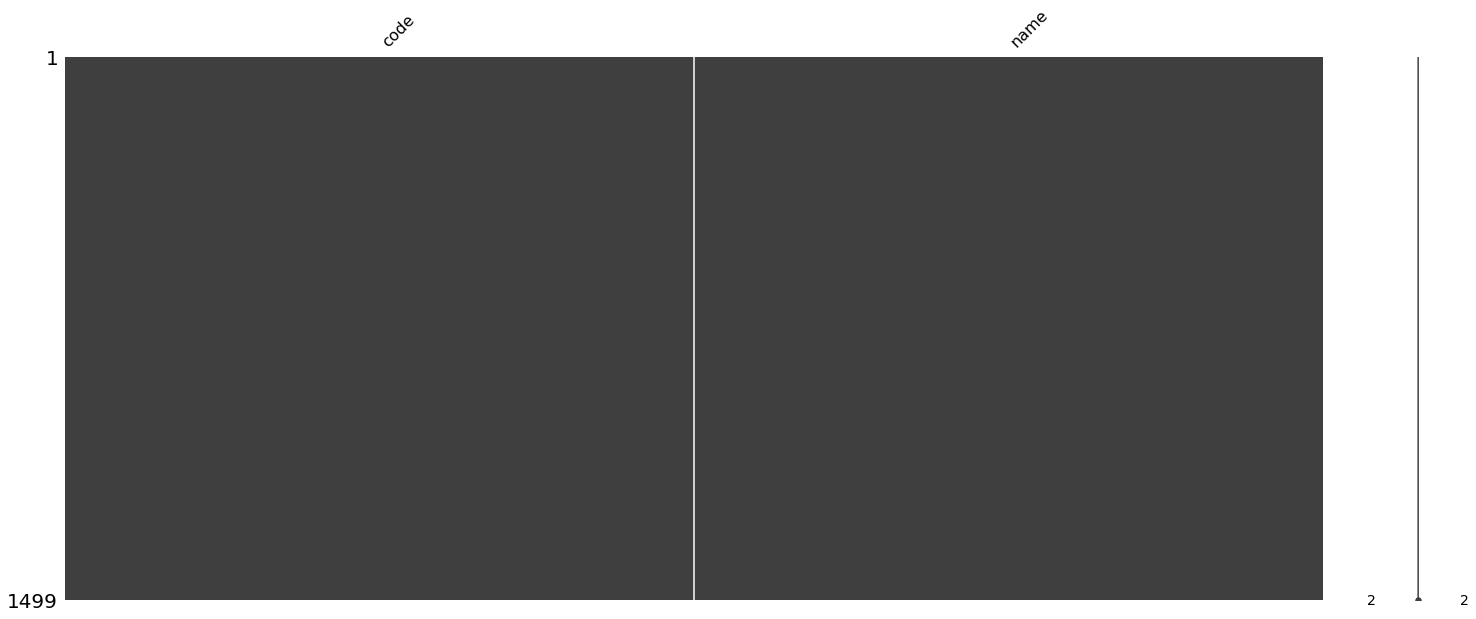

In [19]:
#Validate missing values are filled - visualization
msno.matrix(df_theme) 

In [46]:
#Validate the name are filled according to the corresponding code
#Each code below shows one name, which means the names are filled properly
df_theme.groupby(['code', 'name']).size()

code  name                                        
1     Economic management                              38
10    Rural development                               216
11    Environment and natural resources management    250
2     Public sector governance                        199
3     Rule of law                                      15
4     Financial and private sector development        146
5     Trade and integration                            77
6     Social protection and risk management           168
7     Social dev/gender/inclusion                     130
8     Human development                               210
9     Urban development                                50
dtype: int64